In [1]:
#!pip install torch torchvision

# Convolutional Neural Network

### 컨볼루션 연산의 다양한 인자들을 바꿔보며 결과가 어떻게 달라지는지 알아보는 노트북입니다.

- https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
- in_channels: 입력의 채널 수
- out_channels: 출력의 채널 수
- kernel_size: 필터 혹은 커널의 크기 
- stride: 필터 적용의 간격 (stride: 걸음걸이)
- padding: 입력 데이터를 추가적으로 둘러싸는 층의 두께
- dilation: 책에서 다루지 않고 넘어간 내용이라 링크로 대체합니다. (https://laonple.blog.me/220991967450)
- groups: 입력을 채널 단위로 몇개의 분리된 그룹으로 볼 것인가 
- bias: 편차의 사용여부
- padding_mode: 패딩 적용 방식 (ex. zero padding은 0으로 채우는 경우)

## 1. Settings
### 1) Import required libraries

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## 2. Data

### 1) Download Data

In [3]:
mnist_train = dset.MNIST("../data", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)

### 2) Item

In [4]:
print(mnist_train)

# dataset.__getitem__(idx)
image,label = mnist_train.__getitem__(0)
print(image.size(),label)

# dataset[idx]
image,label = mnist_train[0]
print(image.size(),label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5


### 3) Length

In [5]:
# dataset.__len__()
print(mnist_train.__len__())

# len(dataset)
len(mnist_train)

60000


60000

### 4) Show Image

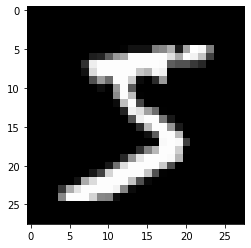

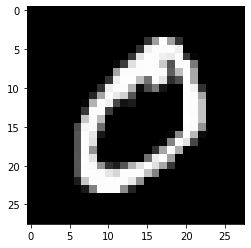

In [6]:
for i in range(2):
    img= mnist_train[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

## 3. Convolution Layer

- torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
- Channels
- Kernel size
- Stride
- Padding
- 파이토치 텐서 사이즈는 다음과 같은 형태를 가지고 있습니다 -> [Batch,Channel,Height,Width]


### 1) Channels

- 채널을 바꾸면 어떻게 될까?

torch.Size([1, 3, 28, 28])


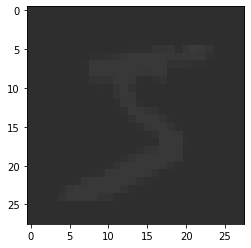

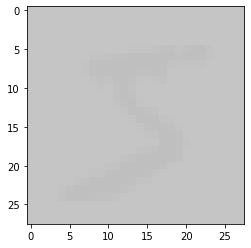

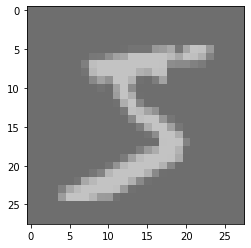

In [7]:
# 먼저 트레이닝 데이터의 첫번째 이미지-라벨 쌍을 불러옵니다.
image,label = mnist_train[0]

# nn.Conv2d 연산을 적용할 수 있도록 이미지 데이터의 형태를 [1,1,28,28]로 만들어줍니다.
# 이는 view 말고도 unsqueeze 함수로도 구현할 수 있습니다.
image = image.view(-1,image.size()[0],image.size()[1],image.size()[2])

# 1개의 채널을 입력으로 받아서 3개의 채널이 나오는 컨볼루션 연산을 정의합니다.
conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1)

# 연산에 입력 이미지를 넣습니다.
output = conv_layer(image)

# 결과의 형태를 확인합니다. 
# 연산에서 정의한대로 결과값의 형태는 [1,3,28,28]이 나옵니다. 
print(output.size())

# 출력의 각 채널별 이미지를 띄워봅니다. 
for i in range(output.size()[1]):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray',vmin=-1,vmax=1)
    plt.show()

### 2) Kernel Size
- 커널 혹은 필터의 크기가 어떤 역할을 할까?

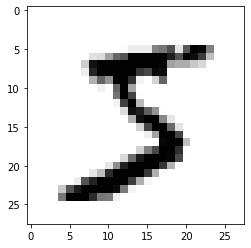

커널 사이즈가 1인 경우 결과값의 크기:torch.Size([1, 1, 28, 28])


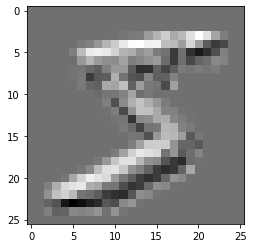

커널 사이즈가 3인 경우 결과값의 크기:torch.Size([1, 1, 26, 26])


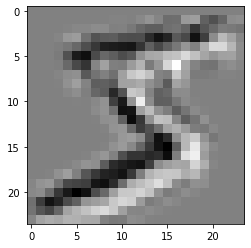

커널 사이즈가 5인 경우 결과값의 크기:torch.Size([1, 1, 24, 24])


In [8]:
# 커널 사이즈를 1로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 1인 경우 결과값의 크기:{}".format(output.size()))


# 커널 사이즈를 3로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 3인 경우 결과값의 크기:{}".format(output.size()))


# 커널 사이즈를 5로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 5인 경우 결과값의 크기:{}".format(output.size()))

### 3) Stride
- 스트라이드를 다르게 하면 어떻게 될까?

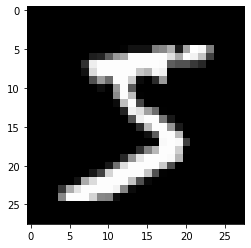

스트라이드가 1인 경우 결과값의 크기:torch.Size([1, 1, 28, 28])


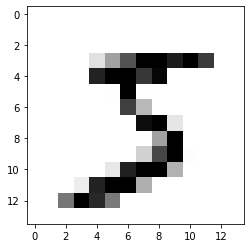

스트라이드가 3인 경우 결과값의 크기:torch.Size([1, 1, 14, 14])


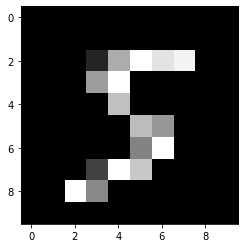

스트라이드가 5인 경우 결과값의 크기:torch.Size([1, 1, 10, 10])


In [9]:
# 스트라이드가 1인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 1인 경우 결과값의 크기:{}".format(output.size()))


# 스트라이드가 3인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=2)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 3인 경우 결과값의 크기:{}".format(output.size()))


# 스트라이드가 5인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 5인 경우 결과값의 크기:{}".format(output.size()))

### 4) Padding
- 패딩을 다르게 주면 어떻게 변할까?

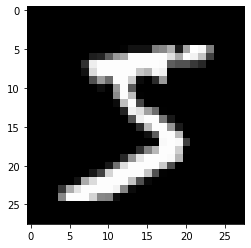

패딩이 0인 경우 결과값의 크기:torch.Size([1, 1, 28, 28])


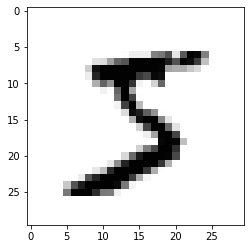

패딩이 1인 경우 결과값의 크기:torch.Size([1, 11, 30, 30])


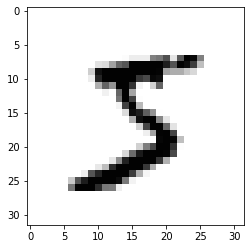

패딩이 2인 경우 결과값의 크기:torch.Size([1, 1, 32, 32])


In [10]:
# 패딩이 없는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,padding=0)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("패딩이 0인 경우 결과값의 크기:{}".format(output.size()))

# 패딩이 1인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=11,kernel_size=1,padding=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("패딩이 1인 경우 결과값의 크기:{}".format(output.size()))

# 패딩이 2인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,padding=2)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("패딩이 2인 경우 결과값의 크기:{}".format(output.size()))